In [10]:
# # !pip install seaborn
# # !pip install scipy
# # !pip install ipywidgets
# !pip install torch

In [11]:

import numpy as np
from glicko2 import load_data
import seaborn as sns
import pandas as pd
import torch
from competition_utils import bot_list

In [12]:
data = load_data()
print((data.keys()))
# bot_list.append("human")
del data["alphazero_v1_flat"]
del data["human"]
del data["alphazero_flat_v1"]
# bot_list.append("alphazero_v1_flat")
print(len(data))
print(len(bot_list))
# del data["human"]
index = ["" for _ in range(len(data))]
new_ratings = [0 for _ in range(len(data))]
indices = []
ind_to_bot = {}
for b in bot_list:
    # print(data[entry]["index"])
    i = data[b]["index"]
    indices.append(i)
    ind_to_bot[i] = b

    print(i, b)
    if i == len(index):
        i-= 1
    index[i] = (int(round(data[b]["full_elo"])), b)
    new_ratings[i] = data[b]["full_elo"]
print(index)
# ratings = np.array([i[0] for i in index])
# ratings = ratings/(400 * np.log10(np.e)) - np.mean(ratings/(400 * np.log10(np.e))) + 1500
# index = [(int(round(r)),i[1]) for r,i in zip(ratings,index)]
# print(index)
# print(len(index))
# done = False
# while not done:
#     for i in range(len(index),-1,step=-1):
#         if index[i] == '':
#             index.pop(i)
#             break
#     print(len(index), i)
#     # print
#     if i == len(index)-1:
#         done = True
# print(indices)


dict_keys(['floyd_combined', 'moves', 'floyd', 'floyd_u', 'markers', 'random', 'connections', 'floyd_d=2', 'negative_floyd', 'human', 'alphazero_flat_v1', 'alphazero_v1_flat'])
9
9
5 random
2 floyd
0 floyd_combined
3 floyd_u
6 connections
1 moves
4 markers
7 floyd_d=2
8 negative_floyd
[(1577, 'floyd_combined'), (1622, 'moves'), (1741, 'floyd'), (1790, 'floyd_u'), (1603, 'markers'), (1265, 'random'), (1643, 'connections'), (1650, 'floyd_d=2'), (871, 'negative_floyd')]


In [13]:

wins1 = np.load("scores/wins1.npy")
bool_inds = [[True if i in indices else False for i in range(wins1.shape[0])],[True if i in indices else False for i in range(wins1.shape[1])]]
print(bool_inds)
wins1 = wins1[bool_inds[0],:][:,bool_inds[1]]
draws1 = np.load("scores/draws1.npy")[bool_inds[0],:][:,bool_inds[1]]
losses1 = np.load("scores/losses1.npy")[bool_inds[0],:][:,bool_inds[1]]
wins2 = np.load("scores/wins2.npy")[bool_inds[0],:][:,bool_inds[1]]
draws2 = np.load("scores/draws2.npy")[bool_inds[0],:][:,bool_inds[1]]
losses2 = np.load("scores/losses2.npy")[bool_inds[0],:][:,bool_inds[1]]
print((wins1+0.5 *draws1+wins2+0.5 *draws2)/np.amax(wins1+wins2+draws1+draws2+losses1+losses2,1))


# wins1 = np.load("scores/wins1.npy")
# # bool_inds = [[True if i in indices else False for i in range(wins1.shape[0])],[True if i in indices else False for i in range(wins1.shape[1])]]
# # print(bool_inds)
# draws1 = np.load("scores/draws1.npy")
# losses1 = np.load("scores/losses1.npy")
# wins2 = np.load("scores/wins2.npy")
# draws2 = np.load("scores/draws2.npy")
# losses2 = np.load("scores/losses2.npy")
# print((wins1+0.5 *draws1+wins2+0.5 *draws2)/np.amax(wins1+wins2+draws1+draws2+losses1+losses2,1))

[[True, True, True, True, True, True, True, True, True, False, False, False, False], [True, True, True, True, True, True, True, True, True, False, False, False, False]]
[[0.         0.46428571 0.28571429 0.44444444 0.66666667 1.
  0.46428571 0.42857143 0.92857143]
 [0.46428571 0.         0.42857143 0.37037037 0.37037037 0.94642857
  0.57142857 0.42857143 1.        ]
 [0.64285714 0.53571429 0.         0.48148148 0.62962963 1.
  0.64285714 0.48214286 0.96428571]
 [0.5        0.57142857 0.5        0.         0.55555556 0.96428571
  0.53571429 0.71428571 0.96428571]
 [0.28571429 0.57142857 0.32142857 0.40740741 0.         0.94642857
  0.35714286 0.39285714 0.96428571]
 [0.         0.01785714 0.         0.         0.01851852 0.
  0.         0.01785714 0.92857143]
 [0.5        0.39285714 0.32142857 0.44444444 0.59259259 0.92857143
  0.         0.67857143 0.96428571]
 [0.57142857 0.53571429 0.44642857 0.25925926 0.55555556 0.91071429
  0.32142857 0.         0.96428571]
 [0.         0.        

In [14]:
wins = wins1 + wins2
wins = wins - np.diag(np.diag(wins))
losses = losses1 + losses2
losses = losses - np.diag(np.diag(losses))
total_games = wins1+losses1+draws1+wins2+losses2+draws2
total_games = total_games - np.diag(np.diag(total_games))

for _ in range(100):
    ratings = new_ratings
    total_ratings = np.zeros(losses1.shape)

    for b in bot_list:
        i = data[b]["index"]
        # ratings if same games were repeated
        total_ratings[:,i] = ratings[i] * (wins1[:,i] + losses1[:,i] + draws1[:,i] + wins2[:,i] + losses2[:,i] + draws2[:,i])


    new_ratings = np.sum(total_ratings + 400 * (wins - losses), axis = 1)/np.sum(total_games, axis=1)
    m = np.mean(new_ratings)
    new_ratings = [r-m+1500 for r in new_ratings]
print(ratings)
print(new_ratings)

[1576.2900956974706, 1564.4916646115064, 1638.1601392757548, 1636.506515272439, 1542.111679439704, 1236.157958384243, 1587.719867746, 1564.4199910234556, 1154.1420885494263]
[1576.2900956974704, 1564.4916646115066, 1638.160139275755, 1636.5065152724392, 1542.1116794397037, 1236.1579583842433, 1587.7198677460003, 1564.4199910234559, 1154.1420885494263]


In [15]:
index = [(int(round(nr)),name[1]) for nr, name in zip(new_ratings,index)]
print(sum(sum(total_games)))

1924.0


Average score for row against column (bootstrapped elos instead of performance elo)


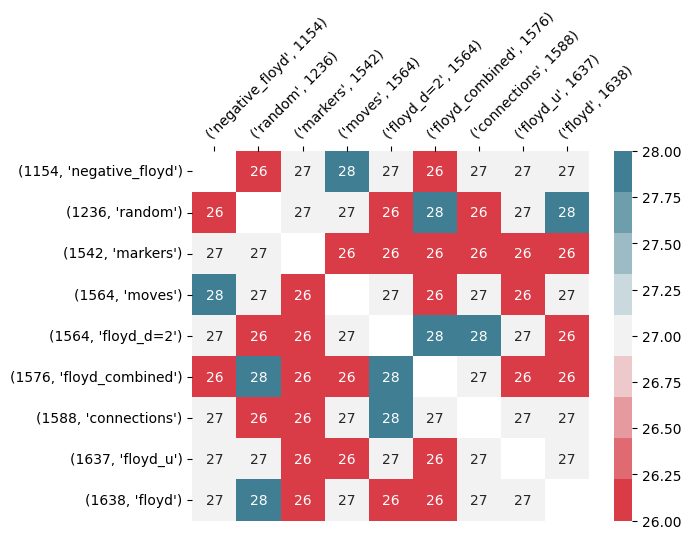

In [32]:
draws1 += np.eye(draws1.shape[0])
num_games = ( 1
        * wins1 
        + losses1 
        + wins2 
        + losses2
        + draws1 
        + draws2 
    )
ave_scores = ( 1
    * wins1
    + wins2 
    + 0.5 * draws1 
    + 0.5 * draws2
    # # - losses1
    # # - losses2
    ) /  (1 
        * np.amax(num_games,1)
    )
arr = num_games
# arr = ave_scores
arr = arr - np.diag(np.diag(arr))
new_order = sorted(list(zip(list(range(len(index))), index)), key = lambda x: x[1][0])
new_index = [index[i[0]] for i in new_order]
new_arr = np.zeros(arr.shape)
for ni, ai in enumerate(new_order):
    new_arr[ni,:] = arr[ai[0],:]
for ai, ni in enumerate(new_order):
    arr[:,ai] = new_arr[:, ni[0]]
del new_arr
try:
    del df
except:
    pass
df = pd.DataFrame(data = arr, index = new_index, columns = new_index)
ax = sns.heatmap(df,annot=True, #annot_kws={'rotation': 60},
# vmax=1, 
# vmin=0,
mask = np.eye(arr.shape[0]),
cmap = [(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)][::-1], #kwargs={title: "average score of row versus column"}
)
ax.set_xticks([i+0.5 for i in range(len(new_index))],labels=[str((s[1], s[0])) for s in new_index],rotation=45, ha="left",
         rotation_mode="anchor"
         )

ax.xaxis.set_ticks_position('top')
print("Average score for row against column (bootstrapped elos instead of performance elo)")

In [17]:
# arr2 = ave_scores
df2 = df.sum(axis=1)
# sns.heatmap(df2)
df2.head(10)

(1154, negative_floyd)    0.000000
(1236, random)            0.982804
(1542, markers)           4.246693
(1564, moves)             4.580026
(1564, floyd_d=2)         4.564815
(1576, floyd_combined)    4.682540
(1588, connections)       4.822751
(1637, floyd_u)           5.305556
(1638, floyd)             5.378968
dtype: float64

In [18]:
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

In [19]:
games =  (wins1 
        + losses1 
        + wins2 
        + losses2
        + draws1 
        + draws2)
print(games)

[[ 1. 26. 26. 26. 26. 28. 27. 28. 26.]
 [26.  1. 27. 26. 26. 27. 27. 27. 28.]
 [26. 27.  1. 27. 26. 28. 27. 26. 27.]
 [26. 26. 27.  1. 26. 27. 27. 27. 27.]
 [26. 26. 26. 26.  1. 27. 26. 26. 27.]
 [28. 27. 28. 27. 27.  1. 26. 26. 26.]
 [27. 27. 27. 27. 26. 26.  1. 28. 27.]
 [28. 27. 26. 27. 26. 26. 28.  1. 27.]
 [26. 28. 27. 27. 27. 26. 27. 27.  3.]]


In [20]:
for i in indices:
    for j in indices:
        if i < j and games[i,j] == 13:
            print(f"python run_yinsh_games_between_two_bots.py 1 --bot1 {ind_to_bot[i]} --bot2 {ind_to_bot[j]}")

In [21]:
!pip install tqdm

In [27]:
from alphazero.coach import Coach
from alphazero.nn_utils import YinshNetFlat as flat_nn
from alphazero.yinsh_nnet import YinshNetWrapper as nn

from yinsh import YinshGame

class dotdict(dict):
    def __getattr__(self, name):
        return self[name]
net_args = dotdict(
    {
        "lr": 0.001,
        "dropout": 0.3,
        "epochs": 100,
        "batch_size": 1024,  # 512,
        "weight_decay": 0.01,
        "gpu": "mps",  # [False, "mps", "cuda"]
        "internal_width": 256,
        "internal_layers": 2,
        "external_width": 128,
        "history_length": 1,
        "show_dummy_loss": True,
    }
)

args = dotdict(
    {
        "first_iter": 21,
        "num_iters": 1000,
        "num_episodes": 100,  # Number of complete self-play games to simulate during a new iteration.
        "temp_threshold": 15,  #
        "update_threshold": 0.55,  # 0.6 During arena playoff, new neural net will be accepted if threshold or more of games are won.
        "maxlen_of_queue": 200000,  # Number of game examples to train the neural networks.
        "num_MCTS_sims": 800,  # Number of games moves for MCTS to simulate.
        "num_arena_games": 40,  # 40 Number of games to play during arena play to determine if new net will be accepted.
        "cpuct": 1,
        "checkpoint": f"checkpoints/{net_args.history_length}x{net_args.internal_layers}x{net_args.internal_width}x{net_args.external_width}/",
        "load_model": True,
        "load_examples": True,
        "skip_first_self_play": True,
        "skip_first_training": False,  # not yet implemented
        "load_folder_file": (
            f"checkpoint/",
            "checkpoint.pth.tar",  # model file
            f"checkpoints/{net_args.history_length}x{net_args.internal_layers}x{net_args.internal_width}x{net_args.external_width}/",
            "checkpoint_19.pth.tar",  # examples checkpoint
        ),
        "num_iters_for_train_examples_history": 20,
    }
)


In [28]:
nnet = nn(flat_nn, net_args)
nnet.load_checkpoint(f"checkpoint/","checkpoint.pth.tar",)
c = Coach(YinshGame, nnet, args)

In [31]:
c.compare_to_floyd(nnet)

Playing versus floyd:   0%|          | 0/10 [00:00<?, ?it/s]


KeyboardInterrupt: 